### ARIMAX 

ARIMAX는 ARIMA 모델의 확장형으로, 외생 변수(Exogenous Variables)를 추가하여 시계열 데이터를 모델링합니다. 

In [5]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. 데이터 생성
np.random.seed(42)
n = 200
time = np.arange(n)
exog = np.sin(2 * np.pi * time / 50) + np.random.normal(0, 0.1, n)  # 외생 변수
endog = 2 * exog + np.random.normal(0, 0.5, n)  # 종속 변수

# 2. ARIMAX 모델 적합
model = SARIMAX(endog, exog=exog, order=(1, 0, 1))
results = model.fit()

# 3. 결과 요약 출력
print(results.summary())

# 4. 예측
forecast = results.forecast(steps=20, exog=np.sin(2 * np.pi * (time[:20]) / 50))
print("Forecast:", forecast)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -141.267
Date:                Tue, 03 Dec 2024   AIC                            290.534
Time:                        20:09:46   BIC                            303.728
Sample:                             0   HQIC                           295.873
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0751      0.046     44.732      0.000       1.984       2.166
ar.L1         -0.1705      1.255     -0.136      0.892      -2.631       2.290
ma.L1          0.1152      1.265      0.091      0.9

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. 데이터 생성
np.random.seed(42)
n = 200
time = np.arange(n)
exog = np.sin(2 * np.pi * time / 50) + np.random.normal(0, 0.1, n)  # 외생 변수
endog = 2 * exog + np.random.normal(0, 0.5, n)  # 종속 변수

# 2. ARIMAX 모델 적합
model = SARIMAX(endog, exog=exog, order=(1, 0, 1))
results = model.fit()

# 3. 결과 요약 출력
print(results.summary())

# 4. 예측
forecast = results.forecast(steps=20, exog=np.sin(2 * np.pi * (time[:20]) / 50))
print("Forecast:", forecast)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -141.267
Date:                Tue, 03 Dec 2024   AIC                            290.534
Time:                        20:07:54   BIC                            303.728
Sample:                             0   HQIC                           295.873
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0751      0.046     44.732      0.000       1.984       2.166
ar.L1         -0.1705      1.255     -0.136      0.892      -2.631       2.290
ma.L1          0.1152      1.265      0.091      0.9

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -396.440
Date:                            Tue, 03 Dec 2024   AIC                            802.879
Time:                                    20:08:50   BIC                            819.035
Sample:                                         0   HQIC                           809.425
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0776      0.091     -0.849      0.396      -0.257       0.102
ma.L1         -0.9996      3.086   

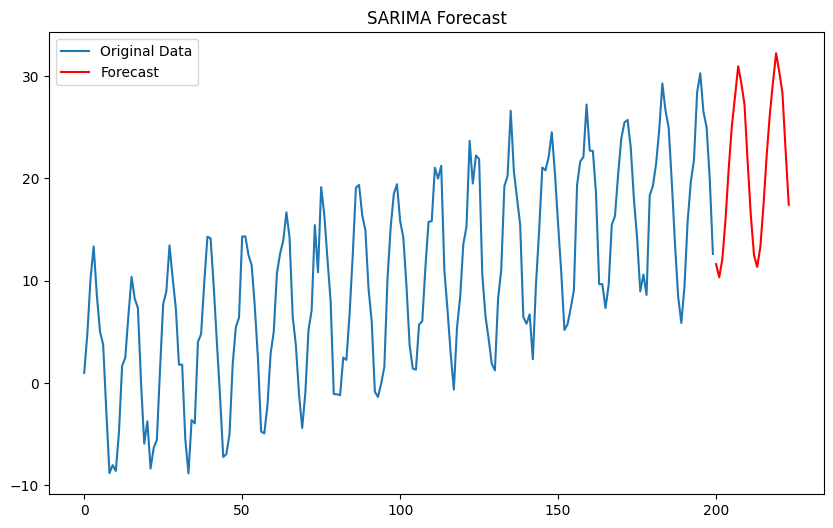

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 1. 데이터 생성 (계절성을 가지는 시계열)
np.random.seed(42)
n = 200
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 12)  # 계절 주기 s=12
trend = 0.1 * np.arange(n)  # 선형 트렌드
noise = np.random.normal(0, 2, n)  # 잡음
data = trend + seasonality + noise

# pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=["value"])

# 2. SARIMA 모델 적합
model = SARIMAX(df["value"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# 3. 결과 출력
print(results.summary())

# 4. 예측
forecast = results.get_forecast(steps=24)
forecast_index = np.arange(n, n + 24)
forecast_values = forecast.predicted_mean

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.plot(df["value"], label="Original Data")
plt.plot(forecast_index, forecast_values, label="Forecast", color="red")
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


결과 해석
SARIMA 모수 추정:

모델 요약에서 𝑝,𝑑,𝑞,𝑃,𝐷,𝑄,𝑠에 대한 계수를 확인.

𝑝-값을 통해 각 계수의 통계적 유의성 확인.

예측 결과:
예측값이 계절적 패턴과 트렌드를 적절히 반영하는지 확인.
RMSE, MAE와 같은 지표로 성능 평가 가능.

p-값:
대부분의 𝑝-값이 0.05보다 큼 → 이 계수들이 통계적으로 유의미하지 않음.
의미:모델이 선택한 AR/MA 계수들이 데이터의 패턴을 잘 설명하지 못할 가능성이 높음.
모델 구성 (𝑝,𝑑,𝑞)와 계절적 구성 (𝑃,𝐷,𝑄,𝑠)을 재조정할 필요가 있음.

잔차 분산 (𝜎2 ):
추정값 3.2129: 모델이 설명하지 못한 변동성을 나타냄.
𝑝-값이 매우 크고 신뢰구간이 넓음 → 모델이 데이터를 잘 설명하지 못한 가능성이 있음.

### SARIMAX

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -145.680
Date:                            Tue, 03 Dec 2024   AIC                            303.360
Time:                                    20:50:53   BIC                            322.778
Sample:                                         0   HQIC                           311.227
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0721      0.045     45.992      0.000       1.984       2.160
ar.L1          0.4969      1.105   

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

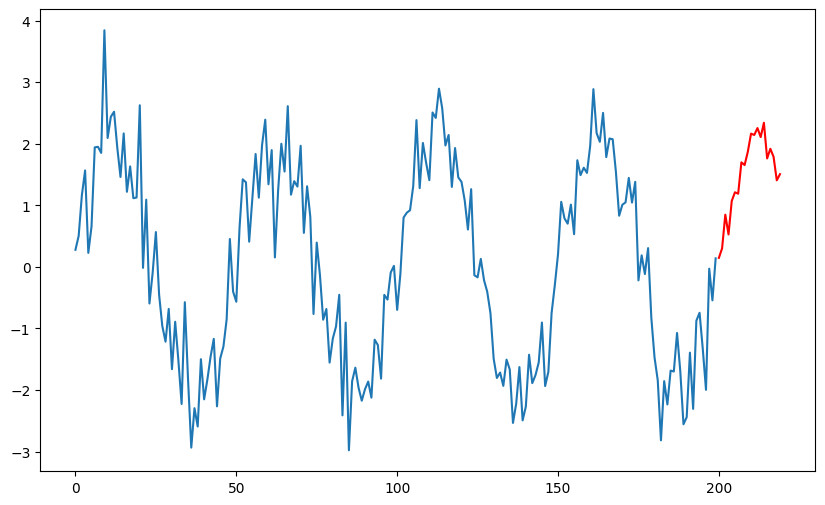

In [6]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 1. 데이터 생성
np.random.seed(42)
n = 200
time = np.arange(n)
exog = np.sin(2 * np.pi * time / 50) + np.random.normal(0, 0.1, n)  # 외생 변수
endog = 2 * exog + np.random.normal(0, 0.5, n)  # 종속 변수

# 2. SARIMAX 모델 적합
model = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# 3. 결과 출력
print(results.summary())

# 4. 예측
forecast_steps = 20
forecast = results.get_forecast(steps=forecast_steps, exog=np.sin(2 * np.pi * (time[:forecast_steps]) / 50))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.plot(endog, label="Original Data")
plt.plot(np.arange(n, n + forecast_steps), forecast_values, label="Forecast", color="red")
plt.fill_between(np.arange(n, n + forecast_steps), forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label="Confidence Interval")
plt.legend()
plt.title("SARIMAX Forecast with Exogenous Variable")
plt.show()


출력 해석
모수 요약 (summary):

계수(Coefficients): 외생 변수와 ARIMA 구성 요소의 계수.
𝑝
p-값: 각 계수의 통계적 유의성 확인.
예측 결과:

예측값이 외생 변수의 변화에 적절히 반응하는지 확인.
신뢰구간이 너무 넓다면 모델이 불확실성을 가지는 것으로 해석.
잔차 분석:

잔차가 백색잡음인지 확인 (Ljung-Box 테스트 등).